<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

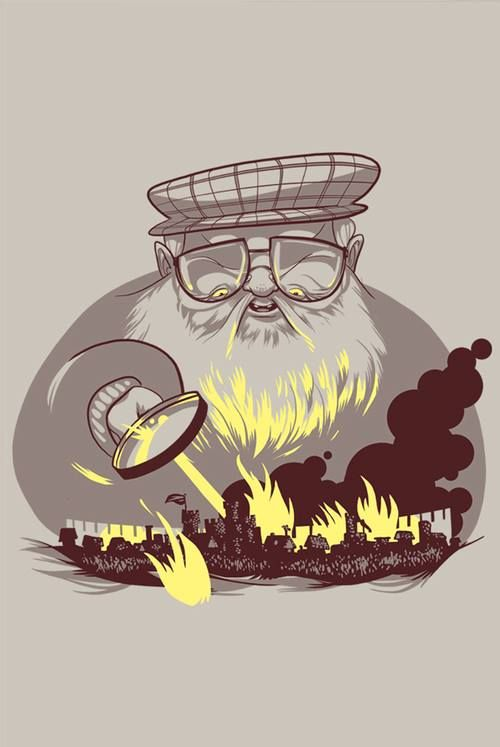

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [330]:
#!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
#!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

In [331]:
#!pip install phik

**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [332]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import phik

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [333]:
train = pd.read_csv("datasets/game_of_thrones_train.csv", index_col='S.No')
test = pd.read_csv("datasets/game_of_thrones_test.csv", index_col='S.No')

In [334]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           495 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,Asshai,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,Riverlands,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,free folk,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [335]:
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              389 non-null    object 
 1   title             221 non-null    object 
 2   male              389 non-null    int64  
 3   culture           189 non-null    object 
 4   dateOfBirth       154 non-null    float64
 5   mother            3 non-null      object 
 6   father            4 non-null      object 
 7   heir              2 non-null      object 
 8   house             343 non-null    object 
 9   spouse            76 non-null     object 
 10  book1             389 non-null    int64  
 11  book2             389 non-null    int64  
 12  book3             389 non-null    int64  
 13  book4             389 non-null    int64  
 14  book5             389 non-null    int64  
 15  isAliveMother     3 non-null      float64
 16  isAliveFather     4 non-null      float64
 17

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783


In [336]:
train.describe()

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
count,1557.000000,279.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,18.000000,22.000000,21.000000,200.00000,1557.000000,1557.000000,279.000000,1557.000000,1557.000000,1557.000000
mean,0.590880,247.551971,0.138728,0.327553,0.431599,0.562620,0.330122,0.666667,0.227273,0.666667,0.79000,0.128452,0.439306,35.290323,0.187540,0.062400,0.778420
std,0.491829,61.550441,0.345774,0.469472,0.495458,0.496223,0.470408,0.485071,0.428932,0.483046,0.40833,0.334700,0.496462,26.364864,1.114648,0.121416,0.415443
min,0.000000,-25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,241.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,16.000000,0.000000,0.013378,1.000000
50%,1.000000,272.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000,24.000000,0.000000,0.023411,1.000000
75%,1.000000,286.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,0.000000,1.000000,49.000000,0.000000,0.063545,1.000000
max,1.000000,299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000


Бинарные признаки: **male, book1, book2, book3, book4, book5, isAliveMother, isAliveFather, isAliveHeir, isAliveSpouse, isMarried, isNoble**

Числовые признаки: **dateOfBirth, DateoFdeath, age, numDeadRelations, popularity**

Признаки **mother, father, heir, isAliveMother, isAliveFather, isAliveHeir** практически отсутствуют, сразу на удаление.

**name**, **spouse** - не понадобится, имена.

**DateoFdeath** - прямая корреляция с целевым признаком, на удаление.

In [337]:
train = train.drop(['name', 'spouse', 'mother', 'father', 'heir', 'isAliveMother', 'isAliveFather', 'isAliveHeir'], axis=1)

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [338]:
# Посмотрим сколько пропусков в оставшихся признаках
round((train.isna().mean()*100),2)

title               53.95
male                 0.00
culture             68.21
dateOfBirth         82.08
house               24.47
book1                0.00
book2                0.00
book3                0.00
book4                0.00
book5                0.00
isAliveSpouse       87.15
isMarried            0.00
isNoble              0.00
age                 82.08
numDeadRelations     0.00
popularity           0.00
isAlive              0.00
dtype: float64

In [339]:
# Пропусков всё равно много, посмотрим на корреляцию.
# Для Phik выделим количественные признаки
interval = ['dateOfBirth', 'age', 'numDeadRelations', 'popularity']

train.phik_matrix(interval).style.background_gradient()

,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
title,1.000000,0.532417,0.984389,0.295416,0.996898,0.523755,0.446025,0.403984,0.492954,0.541880,0.751068,0.588290,1.000000,0.510514,0.771368,0.908500,0.450940
male,0.532417,1.000000,0.250252,0.218965,0.241283,0.065182,0.000000,0.000000,0.151990,0.000000,0.408551,0.139222,0.202922,0.255376,0.061345,0.132793,0.225126
culture,0.984389,0.250252,1.000000,0.000000,0.992136,0.663459,0.607602,0.470984,0.620565,0.462240,0.368246,0.461732,0.708649,0.238786,0.846187,0.690379,0.544468
dateOfBirth,0.295416,0.218965,0.000000,1.000000,0.659243,0.237788,0.632074,0.699546,0.806301,0.335351,0.614980,0.522465,0.650293,0.863474,0.264566,0.134643,0.854083
house,0.996898,0.241283,0.992136,0.659243,1.000000,0.345361,0.710356,0.737519,0.666385,0.553167,0.354032,0.205214,0.622554,0.846762,0.000000,0.000000,0.346740
book1,0.523755,0.065182,0.663459,0.237788,0.345361,1.000000,0.418746,0.220247,0.000000,0.274186,0.000000,0.000000,0.048043,0.153882,0.104089,0.277171,0.167771
book2,0.446025,0.000000,0.607602,0.632074,0.710356,0.418746,1.000000,0.560605,0.152810,0.205701,0.000000,0.232220,0.030276,0.428190,0.000000,0.327523,0.075477
book3,0.403984,0.000000,0.470984,0.699546,0.737519,0.220247,0.560605,1.000000,0.491320,0.344361,0.000000,0.251042,0.000000,0.499745,0.000000,0.360036,0.000000
book4,0.492954,0.151990,0.620565,0.806301,0.666385,0.000000,0.152810,0.491320,1.000000,0.453975,0.179938,0.213434,0.060454,0.505745,0.065194,0.230193,0.427779
book5,0.541880,0.000000,0.462240,0.335351,0.553167,0.274186,0.205701,0.344361,0.453975,1.000000,0.194068,0.090795,0.098925,0.306391,0.000000,0.118738,0.027738


In [340]:
# Пропущеные значения в title, culture, house, heir, spouse заменить пустой категорией.
train[['isAliveSpouse']] = train[['isAliveSpouse']].fillna(-1)
train[['title', 'culture', 'house']] = train[['title', 'culture', 'house']].fillna('A0')

In [341]:
# пропуски численных признаков заполнить медианой
for_median = ['dateOfBirth', 'age']
train[for_median] = train[for_median].fillna(train[for_median].median())

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [342]:
# признак isPopular
train['isPopular'] = (train['popularity'] > 0.5).astype(int)

In [343]:
# признак boolDeadRelations
train['boolDeadRelations'] = (train['numDeadRelations'] > 0).astype(int)

In [344]:
# Нужно дропнуть numDeadRelations	popularity, для порядка.
# train.drop(columns=['numDeadRelations', 'popularity'], inplace = True)

# Нет не нужно, 'popularity' дает больше информации чем isPopular

In [345]:
train['culture'].unique()

array(['Asshai', 'Rivermen', 'Riverlands', 'free folk', 'Dornish',
       'wildling', 'Valyrian', 'first men', 'riverman', 'asshai', 'A0',
       'Ironborn', 'Free Folk', 'Northmen', 'Summer Isles', 'Braavosi',
       'Dothraki', 'Ghiscari', 'Vale mountain clans', 'Reach', 'Tyroshi',
       'Lhazarene', 'Free folk', 'Ironmen', 'Qartheen', 'Lysene',
       'westermen', 'Westerman', 'Qarth', 'Lyseni', 'northmen', 'Qohor',
       'Westeros', 'Norvoshi', 'First Men', 'Meereenese', 'Andal',
       'Astapori', 'Westermen', 'ironborn', 'Ghiscaricari', 'Braavos',
       'Stormlands', 'Valemen', 'Myrish', 'Lhazareen', 'Dornishmen',
       'Sistermen', 'Northern mountain clans', 'Andals', 'Vale',
       'Crannogmen', 'Wildling', 'Dorne', 'Pentoshi', 'Summer Islander',
       'Westerlands', 'Summer Islands'], dtype=object)

In [346]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'Summer Islander', 'Summer Isles'],
    'Ghiscari': ['ghiscari', 'Ghiscaricari', 'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'Lyseni'],
    'Lhazarene': ['Lhazareen'],
    'Andal': ['andal', 'Andals'],
    'Braavosi': ['braavosi', 'Braavos'],
    'Dornish': ['Dorne', 'Dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen', 'Meereenese'],
    'Westermen': ['westermen', 'Westerman', 'Westerlands'],
    'Westerosi': ['Westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen', 'Northern mountain clans'],
    'Free Folk': ['Wildling', 'wildling', 'first men', 'free folk', 'Free folk'],
    'Qartheen': ['qartheen', 'Qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    'Valemen': ['Vale mountain clans', 'Vale'],
    'Ironborn': ['Ironmen', 'ironborn']
}

In [347]:
# culture с подсказкой
for i, y in cult.items():
  train['culture'] = train['culture'].replace(y, i)

In [348]:
# лишнее:
cult_columns = train['culture'].unique()
cult_columns

array(['Asshai', 'Rivermen', 'Riverlands', 'Free Folk', 'Dornish',
       'Valyrian', 'riverman', 'A0', 'Ironborn', 'Northmen',
       'Summer Islands', 'Braavosi', 'Dothraki', 'Ghiscari', 'Valemen',
       'Reach', 'Tyroshi', 'Lhazarene', 'Qartheen', 'Lysene', 'Westermen',
       'Qohor', 'Westerosi', 'Norvoshi', 'First Men', 'Myrish', 'Andal',
       'Astapori', 'Stormlands', 'Sistermen', 'Crannogmen', 'Pentoshi'],
      dtype=object)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [349]:
# При обработке значений признака с титулами выяснилось, что титулов слишком много,
# по этому признак title подлежит удалению
title_unique = train['title'].unique()
test_title_unique = test['title'].unique()

# Проверяем сколько титулов из тестовой выборки отсутствуют в обучающей
result_list = [item for item in test_title_unique if item not in title_unique]

# Печатаем результат
len(result_list)

68

In [350]:
# Аналогичная ситуация с признаком house, нет смысла его использовать в обучении.
title_unique = train['house'].unique()
test_title_unique = test['house'].unique()
result_house = [item for item in test_title_unique if item not in title_unique]

len(result_house)

33

In [351]:
train = train.drop(['title', 'house'], axis=1)

In [352]:
#  Снова посмотрим на корреляцию
train.phik_matrix(interval).style.background_gradient()

,male,culture,dateOfBirth,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
male,1.000000,0.142605,0.057285,0.065182,0.000000,0.000000,0.151990,0.000000,0.082473,0.139222,0.202922,0.077321,0.061345,0.132793,0.225126,0.111542,0.040971
culture,0.142605,1.000000,0.398887,0.400962,0.334660,0.322662,0.340888,0.315731,0.348936,0.263133,0.365957,0.076882,0.564791,0.342244,0.294873,0.174209,0.280900
dateOfBirth,0.057285,0.398887,1.000000,0.123476,0.274591,0.250637,0.251223,0.145913,0.427288,0.401701,0.215888,0.887521,0.467488,0.434453,0.440710,0.000000,0.288054
book1,0.065182,0.400962,0.123476,1.000000,0.418746,0.220247,0.000000,0.274186,0.004770,0.000000,0.048043,0.091176,0.104089,0.277171,0.167771,0.098436,0.206502
book2,0.000000,0.334660,0.274591,0.418746,1.000000,0.560605,0.152810,0.205701,0.090515,0.232220,0.030276,0.340128,0.000000,0.327523,0.075477,0.000000,0.072228
book3,0.000000,0.322662,0.250637,0.220247,0.560605,1.000000,0.491320,0.344361,0.097744,0.251042,0.000000,0.304294,0.000000,0.360036,0.000000,0.000000,0.024447
book4,0.151990,0.340888,0.251223,0.000000,0.152810,0.491320,1.000000,0.453975,0.087171,0.213434,0.060454,0.245271,0.065194,0.230193,0.427779,0.079164,0.000000
book5,0.000000,0.315731,0.145913,0.274186,0.205701,0.344361,0.453975,1.000000,0.048063,0.090795,0.098925,0.142008,0.000000,0.118738,0.027738,0.000000,0.137004
isAliveSpouse,0.082473,0.348936,0.427288,0.004770,0.090515,0.097744,0.087171,0.048063,1.000000,1.000000,0.077976,0.299770,0.270157,0.441414,0.035021,0.000000,0.126763
isMarried,0.139222,0.263133,0.401701,0.000000,0.232220,0.251042,0.213434,0.090795,1.000000,1.000000,0.199176,0.354942,0.208833,0.512527,0.062285,0.000000,0.295351


In [353]:
# признаки с корреляцией меньше 0.1 на удаление (кроме 'isMarried','isAliveSpouse' и 'isNoble')
train = train.drop(['book2','book3', 'book5'], axis=1)

In [354]:
# Нужно дропнуть numDeadRelations	popularity, для порядка.
#train.drop(columns=['numDeadRelations', 'popularity'], inplace = True)

# Но новый признак isPopular уступает popularity, по этому его не оставляем
train.drop(columns=['numDeadRelations', 'isPopular'], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [355]:
train['isAlive'].value_counts(normalize=True)*100

# Задача бинарной классификации

isAlive
1    77.842004
0    22.157996
Name: proportion, dtype: float64

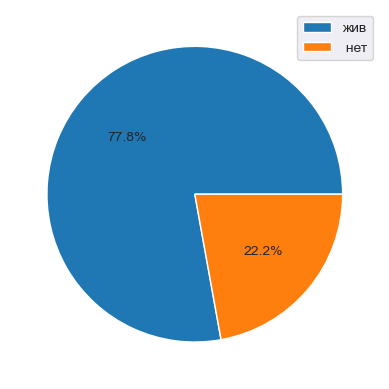

In [356]:
# Живых в 3.5 раза больше, по классам датасет не сбалансирован.

# Можно нарисовать кругляшки
plt.pie(train['isAlive'].value_counts(), autopct='%1.1f%%')
plt.legend(['жив', ' нет'])
plt.show()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [357]:
ohe = OneHotEncoder(drop='first', handle_unknown='ignore')

In [358]:
ohe_result = ohe.fit_transform(train[['culture']])
ohe_culture = ohe.get_feature_names_out(['culture'])
ohe_train_ = pd.DataFrame(ohe_result.toarray(), columns=ohe_culture, index=train.index).convert_dtypes()
ohe_train = pd.concat([train.drop(columns=['culture']), ohe_train_], axis=1)

In [359]:
ohe_train

,male,dateOfBirth,book1,book4,isAliveSpouse,isMarried,isNoble,age,popularity,isAlive,...,culture_Rivermen,culture_Sistermen,culture_Stormlands,culture_Summer Islands,culture_Tyroshi,culture_Valemen,culture_Valyrian,culture_Westermen,culture_Westerosi,culture_riverman
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,272.0,0,0,-1.0,0,0,24.0,0.605351,0,...,0,0,0,0,0,0,0,0,0,0
2,1,208.0,1,1,1.0,1,1,97.0,0.896321,1,...,1,0,0,0,0,0,0,0,0,0
3,1,272.0,0,1,-1.0,0,1,24.0,0.267559,1,...,0,0,0,0,0,0,0,0,0,0
4,0,82.0,0,0,0.0,1,1,23.0,0.183946,0,...,0,0,0,0,0,0,0,0,0,0
5,0,276.0,0,1,1.0,1,1,29.0,0.043478,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,272.0,1,1,-1.0,0,1,24.0,0.160535,1,...,0,0,0,0,0,0,0,0,0,0
1554,0,272.0,1,0,-1.0,0,0,24.0,0.040134,0,...,0,0,0,0,0,0,0,0,0,0
1555,1,272.0,0,1,-1.0,0,0,24.0,0.076923,0,...,0,0,0,0,0,0,0,0,0,0


In [360]:
# Создадим матрицу корреляции, чтоб убрать лишние закодированные признаки
corr_phik = ohe_train.phik_matrix(interval)

#corr_phik.style.background_gradient()
live = pd.DataFrame(corr_phik['isAlive']).sort_values(by='isAlive', ascending=False).head(18)

In [361]:
# Посмотрим значимость признаков относительно целевого признака
live

,isAlive
isAlive,1.000000
dateOfBirth,0.440710
book4,0.427779
popularity,0.301239
culture_Valyrian,0.291030
boolDeadRelations,0.267847
age,0.265932
male,0.225126
book1,0.167771
culture_Braavosi,0.105652


In [362]:
# Список признаков, которые остануться после кодирования,
# чтоб его применить на test'e, культуры которых представлены в test
live_X = live.drop(['isAlive'], axis=0)
live_X

,isAlive
dateOfBirth,0.440710
book4,0.427779
popularity,0.301239
culture_Valyrian,0.291030
boolDeadRelations,0.267847
age,0.265932
male,0.225126
book1,0.167771
culture_Braavosi,0.105652
culture_Ironborn,0.088282


In [363]:
# Создаем копию, чтоб закодировать
zen2_train = ohe_train[live.index.tolist()].copy()

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [364]:
# Наглядно признаки связанные с целевой
zen2_train.phik_matrix(interval).style.background_gradient()

# Наверно можно удалить титулы, чтобы избежать мультиколлениарности
# (да, и не только по этому)

# Закодированные признаки со слабой связью с целевой мы оставляем,
# потому что эти признаки есть в тестовой выборке (по этому и оставлены)

,isAlive,dateOfBirth,book4,popularity,culture_Valyrian,boolDeadRelations,age,male,book1,culture_Braavosi,culture_Ironborn,isNoble,culture_Westermen,culture_Astapori,isMarried,culture_Dornish,culture_Free Folk,isAliveSpouse
isAlive,1.000000,0.440710,0.427779,0.301239,0.291030,0.267847,0.265932,0.225126,0.167771,0.105652,0.088282,0.083644,0.077799,0.066394,0.062285,0.053141,0.048817,0.035021
dateOfBirth,0.440710,1.000000,0.251223,0.434453,0.706872,0.288054,0.887521,0.057285,0.123476,0.000000,0.000000,0.215888,0.026267,0.000000,0.401701,0.000000,0.000000,0.427288
book4,0.427779,0.251223,1.000000,0.230193,0.197638,0.000000,0.245271,0.151990,0.000000,0.187547,0.156307,0.060454,0.000000,0.000000,0.213434,0.091887,0.058946,0.087171
popularity,0.301239,0.434453,0.230193,1.000000,0.247362,0.760128,0.390551,0.132793,0.277171,0.000000,0.035232,0.180229,0.143557,0.000000,0.512527,0.000000,0.000000,0.441414
culture_Valyrian,0.291030,0.706872,0.197638,0.247362,1.000000,0.225553,0.331929,0.000000,0.000000,0.000000,0.000000,0.181363,0.000000,0.000000,0.219415,0.000000,0.000000,0.134589
boolDeadRelations,0.267847,0.288054,0.000000,0.760128,0.225553,1.000000,0.240732,0.040971,0.206502,0.000000,0.038680,0.070365,0.089034,0.000000,0.295351,0.101538,0.000000,0.126763
age,0.265932,0.887521,0.245271,0.390551,0.331929,0.240732,1.000000,0.077321,0.091176,0.000000,0.046878,0.237840,0.000000,0.000000,0.354942,0.000000,0.000000,0.299770
male,0.225126,0.057285,0.151990,0.132793,0.000000,0.040971,0.077321,1.000000,0.065182,0.068864,0.069697,0.202922,0.000000,0.023189,0.139222,0.000000,0.000000,0.082473
book1,0.167771,0.123476,0.000000,0.277171,0.000000,0.206502,0.091176,0.065182,1.000000,0.084136,0.136353,0.048043,0.068303,0.000000,0.000000,0.000000,0.091180,0.004770
culture_Braavosi,0.105652,0.000000,0.187547,0.000000,0.000000,0.000000,0.000000,0.068864,0.084136,1.000000,0.032990,0.149402,0.000000,0.000000,0.078867,0.000000,0.000000,0.030741


In [365]:
zen2_train.head(10)

,isAlive,dateOfBirth,book4,popularity,culture_Valyrian,boolDeadRelations,age,male,book1,culture_Braavosi,culture_Ironborn,isNoble,culture_Westermen,culture_Astapori,isMarried,culture_Dornish,culture_Free Folk,isAliveSpouse
S.No,,,,,,,,,,,,,,,,,,
1,0,272.0,0,0.605351,0,1,24.0,1,0,0,0,0,0,0,0,0,0,-1.0
2,1,208.0,1,0.896321,0,1,97.0,1,1,0,0,1,0,0,1,0,0,1.0
3,1,272.0,1,0.267559,0,0,24.0,1,0,0,0,1,0,0,0,0,0,-1.0
4,0,82.0,0,0.183946,0,0,23.0,0,0,0,0,1,0,0,1,0,1,0.0
5,1,276.0,1,0.043478,0,0,29.0,0,0,0,0,1,0,0,1,1,0,1.0
6,1,272.0,0,1.000000,0,1,24.0,1,0,0,0,0,0,0,0,0,1,-1.0
7,0,183.0,0,0.431438,1,0,26.0,1,0,0,0,1,0,0,1,0,0,1.0
8,0,272.0,0,0.678930,0,1,24.0,1,0,0,0,0,0,0,0,0,1,-1.0
9,0,272.0,0,0.006689,0,0,24.0,1,0,0,0,1,0,0,0,0,0,-1.0


**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [366]:
X_demo = zen2_train.drop('isAlive', axis=1)
y_demo = zen2_train['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [367]:
X_train, X_valid, y_train, y_valid = train_test_split(X_demo, y_demo, train_size=0.75, random_state=42, stratify=y_demo)

In [368]:
interval2 = ['dateOfBirth', 'popularity', 'age']

In [369]:
# Уровняем численные признаки при помощи MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# список всех численных признаков -> interval_
scaler.fit(X_train[interval2])

# Преобразуем обучающую и валидационную части
X_train[interval2] = scaler.transform(X_train[interval2])
X_valid[interval2] = scaler.transform(X_valid[interval2])

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [370]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [371]:
from sklearn.ensemble  import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [372]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1, max_iter=2000, class_weight='balanced')

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_valid)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [373]:
# Шаг 1. создание модели
rfc = RandomForestClassifier(max_depth=4, random_state=42)
abo = AdaBoostClassifier(algorithm='SAMME', n_estimators=80, random_state=42)
gpc = GaussianProcessClassifier()
gnb = GaussianNB()
knc = KNeighborsClassifier(n_neighbors=3)
svc = SVC(C=1.0, gamma='auto')
dtc = DecisionTreeClassifier(max_depth=4, random_state=42)

# Шаг 2. обучение модели
def model_fit(model):
  model.fit(X_train, y_train)
  return model.predict(X_valid)

# Шаг 3. Предсказание на тестовых данных
rfc_pred = model_fit(rfc)
abo_pred = model_fit(abo)
gpc_pred = model_fit(gpc)
gnb_pred = model_fit(gnb)
knc_pred = model_fit(knc)
svc_pred = model_fit(svc)
dtc_pred = model_fit(dtc)

In [374]:
# Шаг 1. создание модели
rfc = RandomForestClassifier(max_depth=4, random_state=42)
abo = AdaBoostClassifier(algorithm='SAMME', learning_rate=0.5, n_estimators=100, random_state=42)
gpc = GaussianProcessClassifier()
gnb = GaussianNB()
knc = KNeighborsClassifier(n_neighbors=3)
svc = SVC(C=1.0, gamma='auto')
dtc = DecisionTreeClassifier(max_depth=4, random_state=42)

# Шаг 2. обучение модели
def model_fit(model):
  model.fit(X_train, y_train)
  return model.predict(X_valid)

# Шаг 3. Предсказание на тестовых данных
rfc_pred = model_fit(rfc)
abo_pred = model_fit(abo)
gpc_pred = model_fit(gpc)
gnb_pred = model_fit(gnb)
knc_pred = model_fit(knc)
svc_pred = model_fit(svc)
dtc_pred = model_fit(dtc)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [375]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [376]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_valid)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.6718


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [377]:
# Шаг 3. Предсказание на тестовых данных
list_pred = [
    ("Random Forest", rfc_pred),
    ("AdaBoost", abo_pred),
    ("Gaussian Process", gpc_pred),
    ("GaussianNB", gnb_pred),
    ("K-NN", knc_pred),
    ("SVC", svc_pred),
    ("Decision Tree", dtc_pred)
]

# Шаг 4. Оценка предсказания по метрике accuracy
for name, i in list_pred:
    accuracy = accuracy_score(y_valid, i)
    print(f"{name} \n Accuracy: {accuracy:.4f} \n")

Random Forest 
 Accuracy: 0.8051 

AdaBoost 
 Accuracy: 0.8154 

Gaussian Process 
 Accuracy: 0.8026 

GaussianNB 
 Accuracy: 0.7744 

K-NN 
 Accuracy: 0.8026 

SVC 
 Accuracy: 0.8077 

Decision Tree 
 Accuracy: 0.8179 



Random Forest
 Accuracy: 0.8051

AdaBoost
 Accuracy: 0.8154

Gaussian Process
 Accuracy: 0.8051

GaussianNB
 Accuracy: 0.7744

K-NN
 Accuracy: 0.8000

SVC
 Accuracy: 0.8077

Decision Tree
 Accuracy: 0.8179

**Выберите лучшую модель.**

*Лучшие модели АДА и Дерево решений.*

*Нужно подобрать для них оптимальные гиперпараметры.*

In [378]:
train = pd.read_csv("datasets/game_of_thrones_train.csv", index_col='S.No')
# Это для общего трейна в конце нужно
X = train.drop('isAlive', axis=1)
y = train['isAlive']

In [379]:
def clear(data, cult):
  drop_columns = ['name', 'spouse', 'mother', 'father', 'heir',
                'isAliveMother', 'isAliveFather', 'isAliveHeir', 'numDeadRelations',
                'book2','book3', 'book5', 'title', 'house',]

  #date_median = data['dateOfBirth'].median()
  #age_median = data['age'].median()
  for_median = ['dateOfBirth', 'age']


  # признак boolDeadRelations
  data['boolDeadRelations'] = (data['numDeadRelations'] > 0).astype(int)

  # Пропущеные значения в title, culture, house, heir, spouse заменить пустой категорией.
  data[['isAliveSpouse']] = data[['isAliveSpouse']].fillna(-1)
  data[['culture']] = data[['culture']].fillna('A0')

  # пропуски численных признаков заполнить медианой
  #data[['dateOfBirth']] = data[['dateOfBirth']].fillna(data_median)
  #data[['age']] = data[['age']].fillna(age_median)
  data[for_median] = data[for_median].fillna(data[for_median].median())

  data = data.drop(drop_columns, axis=1)

  for i, y in cult.items():
    data['culture'] = data['culture'].replace(y, i)

  return data

In [380]:
X = clear(X, cult)

X.head()

,male,culture,dateOfBirth,book1,book4,isAliveSpouse,isMarried,isNoble,age,popularity,boolDeadRelations
S.No,,,,,,,,,,,
1,1,Asshai,272.0,0,0,-1.0,0,0,24.0,0.605351,1
2,1,Rivermen,208.0,1,1,1.0,1,1,97.0,0.896321,1
3,1,Riverlands,272.0,0,1,-1.0,0,1,24.0,0.267559,0
4,0,Free Folk,82.0,0,0,0.0,1,1,23.0,0.183946,0
5,0,Dornish,276.0,0,1,1.0,1,1,29.0,0.043478,0


In [381]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   male               1557 non-null   int64  
 1   culture            1557 non-null   object 
 2   dateOfBirth        1557 non-null   float64
 3   book1              1557 non-null   int64  
 4   book4              1557 non-null   int64  
 5   isAliveSpouse      1557 non-null   float64
 6   isMarried          1557 non-null   int64  
 7   isNoble            1557 non-null   int64  
 8   age                1557 non-null   float64
 9   popularity         1557 non-null   float64
 10  boolDeadRelations  1557 non-null   int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 146.0+ KB


In [382]:
test = clear(test, cult)

test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   male               389 non-null    int64  
 1   culture            389 non-null    object 
 2   dateOfBirth        389 non-null    float64
 3   book1              389 non-null    int64  
 4   book4              389 non-null    int64  
 5   isAliveSpouse      389 non-null    float64
 6   isMarried          389 non-null    int64  
 7   isNoble            389 non-null    int64  
 8   age                389 non-null    float64
 9   popularity         389 non-null    float64
 10  boolDeadRelations  389 non-null    int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 36.5+ KB


In [383]:
test.head()

,male,culture,dateOfBirth,book1,book4,isAliveSpouse,isMarried,isNoble,age,popularity,boolDeadRelations
S.No,,,,,,,,,,,
1558,0,A0,156.0,0,0,-1.0,0,0,100.0,0.050167,0
1559,0,Asshai,267.0,0,1,-1.0,0,0,32.0,0.745819,0
1560,0,A0,267.0,0,1,-1.0,0,0,32.0,0.010033,0
1561,1,A0,267.0,1,1,-1.0,0,1,32.0,0.220736,0
1562,1,Riverlands,262.0,1,1,1.0,1,0,38.0,0.434783,0


In [384]:
ohe_train = X.copy()
ohe_test = test.copy()

In [385]:
ohe_train.head()

,male,culture,dateOfBirth,book1,book4,isAliveSpouse,isMarried,isNoble,age,popularity,boolDeadRelations
S.No,,,,,,,,,,,
1,1,Asshai,272.0,0,0,-1.0,0,0,24.0,0.605351,1
2,1,Rivermen,208.0,1,1,1.0,1,1,97.0,0.896321,1
3,1,Riverlands,272.0,0,1,-1.0,0,1,24.0,0.267559,0
4,0,Free Folk,82.0,0,0,0.0,1,1,23.0,0.183946,0
5,0,Dornish,276.0,0,1,1.0,1,1,29.0,0.043478,0


In [386]:
ohe.fit(ohe_train[['culture']])

def ohe_transform(ohe, data, live):
  ohe_result = ohe.transform(data[['culture']])
  ohe_culture = ohe.get_feature_names_out(['culture'])
  ohe_data_ = pd.DataFrame(ohe_result.toarray(), columns=ohe_culture, index=data.index).convert_dtypes()
  ohe_data = pd.concat([data.drop(columns=['culture']), ohe_data_], axis=1)
  ohe_data = ohe_data[live.index.tolist()]
  return ohe_data

In [387]:
ohe_train = ohe_transform(ohe, ohe_train, live_X)

In [388]:
ohe_train.shape

(1557, 17)

In [389]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [390]:
ohe_test = ohe_transform(ohe, ohe_test, live_X)

ohe_test.shape

(389, 17)

In [391]:
# список всех численных признаков -> interval2
scaler.fit(X[interval2])

# Преобразуем обучающую и тестовую части
ohe_train[interval2] = scaler.transform(ohe_train[interval2])
ohe_test[interval2] = scaler.transform(ohe_test[interval2])

Данные подготовлены.

Далее ищем оптимальные гиперпараметры, через кросс-валидацию.

In [392]:
def create_model(model, X, y):
  model = DecisionTreeClassifier(random_state=42)
  distributions = {'max_depth': range(1, 21),
                   'min_samples_split': range(2, 13),
                   'min_samples_leaf': range(1, 11),
                   'criterion': ['gini', 'entropy'],
                   'max_leaf_nodes': list(range(2, 31))
                   }
  model_fit = RandomizedSearchCV(model, param_distributions=distributions,
                                        n_iter=100, scoring='accuracy', n_jobs=-1, cv=6,
                                        verbose=2, random_state=42)

  model_fit.fit(X, y)
  best_model = model_fit.best_estimator_
  print(f'\nAccuracy score: {model_fit.best_score_:.4f}')
  print(f'Best parameters: {model_fit.best_params_}')
  return best_model

In [393]:
best_model = create_model(dtc, ohe_train, y)

Fitting 6 folds for each of 100 candidates, totalling 600 fits
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=29, min_samples_leaf=6, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_leaf_nodes=9, min_samples_leaf=9, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, max_leaf_nodes=18, min_samples_leaf=9, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=9; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=29, min_samples_leaf=10, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_leaf_nodes=14, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=19, max_leaf_nodes=27, min_samples_leaf=9, min_samples_split=7; total time=   0.0s
[CV] END criterion=gini, max_depth=19, max_leaf_nodes=27, min_samples_leaf=9, min_samples_split=7; total ti

In [394]:
y_pred = best_model.predict(ohe_test)

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [395]:
#!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

In [396]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

FileNotFoundError: [Errno 2] No such file or directory: '/content/submission.csv'

In [406]:
submission['isAlive'] = y_pred

Как сохранить измененный Pandas DataFrame в csv файл:

In [407]:
submission.to_csv("/content/new_submission.csv", index=False)